# Workshop 2: Regression and Neural Networks

https://github.com/Imperial-College-Data-Science-Society/workshops

1. Introduction to Data Science
2. **Regression and Neural Networks**
3. Classifying Character and Organ Images
4. Demystifying Causality and Causal Inference
5. A Primer to Data Engineering
6. Natural Language Processing (NLP) by using Attention
7. Art and Music using GANs
8. Probabilistic Programming in Practice
9. Missing Data in Supervised Learning

![alt-text](icdss.jpeg)

# Projects

Thoughts?

![https://www.google.com/imgres?imgurl=https%3A%2F%2Fi.pinimg.com%2Foriginals%2Ffb%2Fa9%2F08%2Ffba908499343b32f308b2013dbabd459.jpg&imgrefurl=https%3A%2F%2Fwww.pinterest.com%2Fpin%2F131097039136709839%2F&tbnid=q7dzCXhTlV80sM&vet=12ahUKEwigmeXByL7sAhVM-RQKHVQwAg8QMygIegUIARDnAQ..i&docid=LLUQneqIq-d8RM&w=852&h=480&q=lightbulb%20idea&ved=2ahUKEwigmeXByL7sAhVM-RQKHVQwAg8QMygIegUIARDnAQ](bulb.png)

References I used to prepare this session:

- Past ICDSS workshops
- Patrick Rebischini's notes: http://www.stats.ox.ac.uk/~rebeschi/teaching/AFoL/20/index.html
- https://fleuret.org/ee559/
- https://en.wikipedia.org/wiki/Ordinary_least_squares
- https://www.astroml.org/book_figures/chapter9/fig_neural_network.html
- https://github.com/pytorch/examples/blob/master/mnist/main.py
- Lakshminarayanan et al. (2016) http://papers.nips.cc/paper/5234-mondrian-forests-efficient-online-random-forests.pdf
- Garnelo et al. (2018) https://arxiv.org/pdf/1807.01622.pdf
Other recommended reading:
- Regression and Other Stories by Andrew Gelman, Jennifer Hill and Aki Vehtari
- Elements of Statistical Learning

## Introduction

Suppose we have some $(x_1, y_1),\ldots,(x_{100},y_{100})$ that is generated by $y=2x + \text{noise}$.

Text(0, 0.5, 'y')

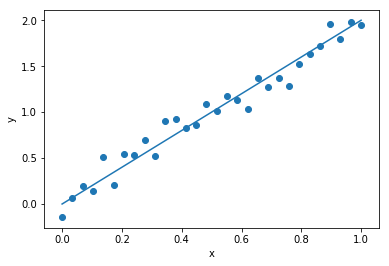

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 30)
noise = 0.1*np.random.normal(size=30)
y = 2*x + noise
plt.scatter(x, y)
plt.plot(x, 2*x)
plt.xlabel("x")
plt.ylabel("y")

In practice, we don't know the underlying data-generating process, but rather we can pose **"hypotheses"** as to how the data is generated. For example in the above example:

- **Linear Models:** $y = x\beta + \sigma\mathcal{N}(0,1)$ where $\beta$ represents the gradient of the slope and $\sigma$ is the amplitude of the noise.
- **Nonparametric models:**$y = f(x) + \sigma\mathcal{N}(0,1)$ where $f$ is some function in some hypothesis function space $\mathcal{H}$. E.g. $f(x) = x\beta$
    - Neural networks
    - Regression trees, random forests
    - Gaussian processes
- $y = \sum_{i=1}^T w_i\times f_i(x) + g(x)$ where $w_i$ represent weights, $f_i\in\mathcal{H}$ and $g(x)$ represents the noise for value $x$.
- etc...

Once we have a hypothesis we can **estimate $f$** using many different tools!

## Out of sample prediction##

Given $x_*$, the prediction would be $f_*(x_*)$, where $f_*$ is the estimated function of $f$.

But first, to formulate the hypothesis, we need to scrutinate the data via exploratory data analysis.

For the data above, clearly a linear model (straight line) plus some small Gaussian noise is sufficient. So the task is just to estimate $\beta$ and $\sigma$ so that the line **fits the dots well**.

## General setting
In practice, we have to deal with data coming in different formats and possible generating processes:

- **Count data**: $y_i\sim\text{Poisson}(f(x_i))$ or $y_i\sim\text{NegativeBinomial}(f(x_i))$
    - Football goals, disease infection counts
- **Binomial or Multinomial**: $y_i\sim\text{Binomial}(n, f(x_i))$, $y_i\sim\text{Multinomial}(f_1(x_i),\ldots, f_k(x_i))$ etc...
    - Coin toss outcomes, customer subscription outcome, classifying digits or characters
- **Gamma**: $y_i\sim \text{Gamma}(k, f(x_i))$
    - Rainfall

## Gaussian noise regression

For illustration purposes, let's focus on regression in the setting $y=f(x) + \sigma \mathcal{N}(0,1)$ for $f\in\mathcal{H}$ and $\sigma\geq0$.

## Foundations of Statistical Learning

Previously, I mentioned that we need to build a function that **fits the dots well**. There are 2 types of notions in statistical learning: **prediction** and **estimation**. We will use the following notation:

- $n$ training points
- $X_1,\ldots,X_n $ are *features* in a *feature space* $\mathcal{X}$. Could be a mixture of categorial or continuous features.
- $Y_1,\ldots,Y_n $ are labels/response in a space $\mathcal{Y}$ (e.g. $\mathbb{R}$ or $\mathbb{R}^k$)
- **[For your interest:]** Some probability space $(\mathcal{X}, \mathcal{B}, \mathbb{P})$ where we can measure probabilities of events in the set $\mathcal{B}$. e.g. the set of all possible cointoss outcomes is a set $\mathcal{B}$
- **Hypothesis space** $\mathcal{H}\subset \mathcal{C}:=\{f: f:\mathcal{X}\rightarrow\mathcal{Y}\}$: Restriction of the types of functions we want to use. e.g. for a type of neural network, the multilayer perceptron (MLP) with $m$ layers, we have $\mathcal{H}:= \{f:\mathcal{X}\rightarrow\mathcal{Y}: f(\cdot) = f(\cdot; \sigma_1,\ldots,\sigma_m, W_1,\ldots,W_m), \text{ where }\sigma_i, W_i \text{ are the activation functions and weights} \}$.
- **Prediction Loss function** $\ell:\mathcal{H}\times\mathcal{X}\times\mathcal{Y}\rightarrow \mathbb{R}_+$: To define what **fits the dots well** means.
 

## Prediction

We want to pick $f$ such that it minimises the **expected or population risk** when a new independent datapoint $(X, Y)$ comes in

$$
f_* := \text{argmin}_{f\in\mathcal{C}} \mathbb{E}_{\mathbb{P}}\left[ \ell(f, X, Y) \right] := \text{argmin}_{f\in\mathcal{C}} r(f) 
$$

We denote $f_*$ is the **optimum**, which is unknown. We want to construct an approximation to $f_*$ based on the $n$ training points and the hypothesis $\mathcal{H}$ that controls the complexity of $f$. This approximation is close to

$$
f_{**}:= \text{argmin}_{f\in\mathcal{H}} \mathbb{E}_{\mathbb{P}}\left[ \ell(f, X, Y) \right]
$$

Define the **excess risk** as

$$
r(f) - r(f_{**}) = [r(f) - r(f_*)] + [r(f_*) - r(f_{**})],
$$

where $f\in \mathcal{H}$. **The goal of statistical learning for prediction is to minimise the excess risk** with respect to the sample size $n$ and the space of functions $\mathcal{H}$. Note that the decomposition yields an approximation and estimation error.

Difficult to do in practice, so we need **empirical risk minimisation** via the observed training set $(X_i,Y_i)_{i=1}^n$ as a proxy for the expected/population risk:

$$
R(f):= \frac{1}{n}\sum_{i=1}^n \ell(f, X_i, Y_i) ,\quad f_*^R := \text{argmin}_{f\in\mathcal{H}} R(f)
$$

to minimise

$$
r(f) - r(f_{**}).
$$

## Key takeaways and Bigger Picture:##

- It is important to understand the tradeoff between optimisation and statistical errors. 
- Optimisation is only 1 part of the inequality, and vice versa for statistical modelling errors.


More details in Rebischini's notes!

## Estimation

We need:
- Some training set of size $n$ generated by $f_*\in\mathcal{H}$
- Loss function $\ell:\mathcal{H}\times\mathcal{H}\rightarrow \mathbb{R}_+$

Return:
- An algorithm that returns an estimate of $f_*$ that minimises and controls $\ell(f,f_*)$ based on the $n$ training points and $\mathcal{H}$.

## Back to Gaussian noise regression

There are lots of ways we can pose this problem. One way is to use 

- $\ell(f, X, Y) = ||f(X) - y||_2^2 = (f(X) - y)^2$ - the **\ell_2 loss**
- $\ell(f, X, Y) = |f(X) - y|$ - the **\ell_1 loss**
- This yields the **mean squared error (MSE)** $R(f) = \frac{1}{n}\sum_{i=1}^n (f(X_i) - y_i)^2$

In theory, these give
$$\ell_2:  f_{**}(x) = E[Y|X=x]$$

$$\ell_1: f_{**}(x) = \text{Median}[Y|X=x]$$

Depending on the situation, we can either use approximate gradient-based methods (e.g. gradient descent), Monte Carlo methods or the analytical maximum likelihood estimation (MLE). 

## Linear regression

$$
y = X\beta_0 + \sigma\mathcal{N}(0,1)
$$

$\beta_0 = (1,\beta_{0,1},\ldots,\beta_{0,d-1})^T$ - the 1 represents the intercept.

We also call this **ordinary least squares**:

- Assume that $X$ is full rank
$$\hat{\beta} = \text{argmin}_{\beta} ||y- X\beta ||_2^2 \iff X^T(y - X\beta) = 0 \iff \hat{\beta} = X(X^TX)^{-1}X^T y \sim \mathcal{N}(X\beta_0, \sigma^2 X(X^TX)^{-1}X^T)$$

Geometrically: $y - X\hat{\beta} \perp X\beta_0 \iff \hat{\beta}$ minimises $||y-X\beta ||_2^2$

https://en.wikipedia.org/wiki/Ordinary_least_squares:
![](ols.png)


In [2]:
import statsmodels.api as sm

# fit the model
m = sm.OLS(y, sm.tools.add_constant(x))
res = m.fit()

print(res.summary(), "\n sigma~", np.sqrt(sum(res.resid**2) / (30 - 2)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     704.6
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           2.16e-21
Time:                        17:39:37   Log-Likelihood:                 22.372
No. Observations:                  30   AIC:                            -40.74
Df Residuals:                      28   BIC:                            -37.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0381      0.042      0.901      0.3

We can see that our algorithm manages to estimate the parameters of the models pretty well:

- $\hat{\beta}\approx 2$ with $95\%$ confidence intervals [1.945, 2.091]
- $const\approx 0$ with $95\%$ confidence intervals [-0.048, 0.036]
- $\hat{\sigma}^2  \approx 0.01$
- **95% confidence intervals** = if I sample the data infinitely many times and estimate infinitely many confidence intervals, I will expect that 95% of the time the confidence intervals will contain the true, unknown parameter value.

Given $x_*$ as a test point, the prediction would be $\hat{y} = x_*^T \hat{\beta}$.

Text(0, 0.5, 'y')

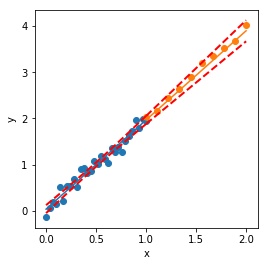

In [3]:
# Fit of the OLS estimator
x_test = np.linspace(1, 2, 10)
noise = 0.1*np.random.normal(size=10)
y_test = 2*x_test + noise
plt.figure(figsize=(4,4))
plt.scatter(x, y)
plt.plot(x, res.predict(sm.add_constant(x)))
pred_int_train = res.get_prediction(sm.add_constant(x)).conf_int()
plt.plot(x, pred_int_train[:,0], 'r--', lw=2); plt.plot(x, pred_int_train[:,1], 'r--', lw=2)

# the prediction intervals. Note that htey can be larger
plt.scatter(x_test, y_test)
plt.plot(x_test, res.predict(sm.add_constant(x_test)))
pred_int_test = res.get_prediction(sm.add_constant(x_test)).conf_int()
plt.plot(x_test, pred_int_test[:,0], 'r--', lw=2); plt.plot(x_test, pred_int_test[:,1], 'r--', lw=2)
plt.xlabel("x"); plt.ylabel("y")

## Other regression methods

- Regression trees: Classification and Regression Trees (CART)
- XGBoost: Tree-boosting algorithm widely used in production pipelines for firms like Amazon 
- Random forest: Most popular tree-based algorithm
- Mondrian Forest: Nice statistical and online properties


## Regression tree

Example of a tree (Lakshminarayanan et al. (2016))
![alt text](mondrian.png)

Text(0, 0.5, 'y')

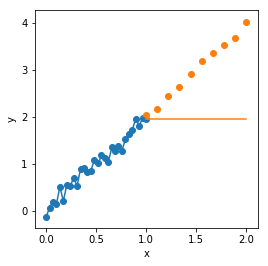

In [4]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
m_tree = DecisionTreeRegressor(max_depth=5)
m_tree.fit(np.expand_dims(x, 1), y)
y_pred = m_tree.predict(np.expand_dims(x_test, 1))

plt.figure(figsize=(4,4))
plt.scatter(x, y)
plt.plot(x, m_tree.predict(np.expand_dims(x, 1)))

# the prediction intervals. Note that htey can be larger
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred)
plt.xlabel("x")
plt.ylabel("y")

## XGBoost

Text(0, 0.5, 'y')

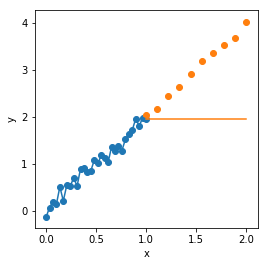

In [5]:
import xgboost as xgb

num_round = 10
m_xgb = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=1000)
m_xgb.fit(np.expand_dims(x, 1), y)

plt.figure(figsize=(4,4))
plt.scatter(x, y)
plt.plot(x, m_xgb.predict(np.expand_dims(x, 1)))

# the prediction intervals. Note that htey can be larger
plt.scatter(x_test, y_test)
plt.plot(x_test, m_xgb.predict(np.expand_dims(x_test, 1)))
plt.xlabel("x")
plt.ylabel("y")

## Random Forest

This essentially uses bagging:
$$\hat{f}(x) = \frac{1}{T}\sum_{t=1}^T \hat{f}_t(x)$$,
where $\hat{f}_t$ are trained regression trees from randomly sampled (with replacement) sets $\{(x_j, y_j)_j\}_t$ using random feature subsets. 

Text(0, 0.5, 'y')

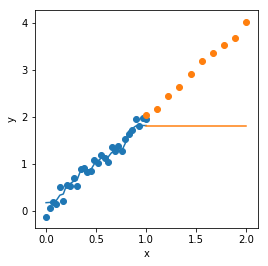

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
m_rf = RandomForestRegressor(max_depth=2, random_state=0)
m_rf.fit(np.expand_dims(x, 1), y)
m_rf.predict(np.expand_dims(x_test, 1))

plt.figure(figsize=(4,4))
plt.scatter(x, y)
plt.plot(x, m_rf.predict(np.expand_dims(x, 1)))

# the prediction intervals. Note that htey can be larger
plt.scatter(x_test, y_test)
plt.plot(x_test,m_rf.predict(np.expand_dims(x_test, 1)))
plt.xlabel("x")
plt.ylabel("y")

## Neural Networks

Neural networks are essentially parametric functions that are composed of **layers of neurons**.

https://www.astroml.org/book_figures/chapter9/fig_neural_network.html

![alt text](fig_neural_network_1.png)

- Multilayer Perceptron (MLP): $f(x) = f_n\circ\cdots f_1(x)$ with $f_j = W_j x + b_j$ with weights $W_j$ and biases $b_j$.
- Can also have other useful layers like max-pooling, batch normalisation, attention and convolution (feature extraction).
- Parameter optimisation via gradient-based methods such as stochastic gradient descent. Using the backpropagation trick, can allow for efficient optimisation. Optimisation speed can be enhanced using multiple GPU or TPU memory.

**Key applications:**
- Image processing: classification, denoising, inpainting, generation
- Function approximations for complex models and algorithms
- Time series, recommendation engines

**Key issues:**
- Overparameterisation: regularisation and sparsity
- Feature engineering
- Vanishing gradient: batch normalisation and dropout

## Image Classification

In [7]:
# https://github.com/pytorch/examples/blob/master/mnist/main.py
# Code is in the folder in the main.py script
# Don't run it during the session - might take a while!
# %run main.py

# we will use pretrained models from torchvision
import torch
from torchvision import datasets, transforms
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# https://github.com/rois-codh/kmnist
# We will use the Kuzushiji-MNIST dataset
dataset2 = datasets.KMNIST('../data', train=False,
                   transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=16)
for img_batch, label_batch in test_loader:
    print(img_batch.shape, label_batch)
    break

torch.Size([16, 1, 28, 28]) tensor([2, 9, 3, 8, 3, 3, 8, 3, 2, 5, 6, 3, 3, 3, 1, 5])


![alt text](kmnist_examples.png)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


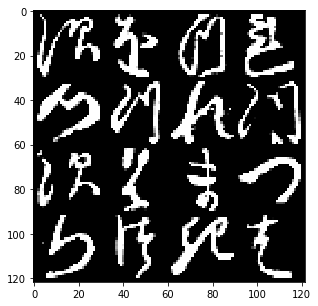

In [8]:
from torchvision.utils import make_grid

# Read images into torch.Tensor
all_imgs = img_batch
# Visualize sample on a grid
img_grid = make_grid(all_imgs, nrow=4)
plt.figure(figsize=(5,5))
plt.imshow(img_grid.permute(1, 2, 0).numpy())

In [9]:
from main import Net 
model = Net()
# load some model I pretrained on GPU memory into CPU memory
model.load_state_dict(torch.load("kmnist_cnn.pt", map_location=torch.device('cpu')))
model.eval()
model(img_batch).argmax(dim=1, keepdim=True), label_batch

(tensor([[3],
         [9],
         [3],
         [8],
         [3],
         [3],
         [8],
         [3],
         [2],
         [5],
         [6],
         [3],
         [3],
         [3],
         [1],
         [5]]),
 tensor([2, 9, 3, 8, 3, 3, 8, 3, 2, 5, 6, 3, 3, 3, 1, 5]))

## Image Inpainting

https://arxiv.org/pdf/1807.01622.pdf
![alt text](np.png)

## High-dimensional regression

Overview:
- Classical statistics: $d < \infty$, $n\rightarrow\infty$
- Non-asymptotic: $d<\infty, n<\infty$
- Non-parametric: $d\rightarrow \infty, n<\infty$
- Asymptotic: $d\rightarrow \infty, n\rightarrow\infty$

In the realm of high-dimensional statistics, we usually have $d>n$ or e.g. $d= \mathcal{O}(n^\alpha)$, where $d$ is the number of features and $n$ is the number of data points. 

This happens when you have lots of features and the actual data generating features are **sparse**, i.e. $d$ is large but a small $d_0$ is used or are important for the regression. Therefore the usual linear regression assumption that **$X$ is full rank** will not hold. We can, however, introduce regularisation and use the Least-angle regression (LARS; Efron, Hastie, Johnstone and Tibshirani (2004)) algorithm to fit our model. The Lasso

$$
\text{minimise } || y - X\beta||_2^2, \quad \text{subject to } \sum_{j=1}^d |\beta_j| \leq t
$$

We now work with a diabetes dataset:

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

Computing regularization path using the LARS ...
.

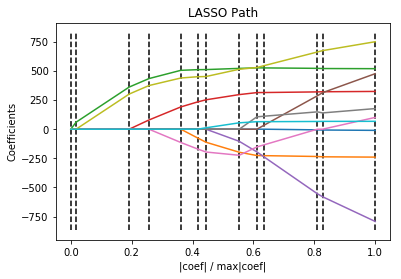

In [11]:
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

Thank you for your attention! 

https://github.com/Imperial-College-Data-Science-Society/workshops

1. Introduction to Data Science
2. **Regression and Neural Networks**
3. Classifying Character and Organ Images
4. Demystifying Causality and Causal Inference
5. A Primer to Data Engineering
6. Natural Language Processing (NLP) by using Attention
7. Art and Music using GANs
8. Probabilistic Programming in Practice
9. Missing Data in Supervised Learning

![alt-text](icdss.jpeg)
